In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import missingno as msno
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [2]:
data=pd.read_csv('data/adult.data',sep=',')

In [3]:
data.columns=['age','workclass','fnlwgt','education','education-num',  
                                                    'marital-status' ,'occupation' ,
                                                    'relationship', 'race', 'sex' ,'capital-gain', 'capital-loss', 
                                                    'hours-per-week', 'native-country', 'label'
                                                   ]

In [4]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


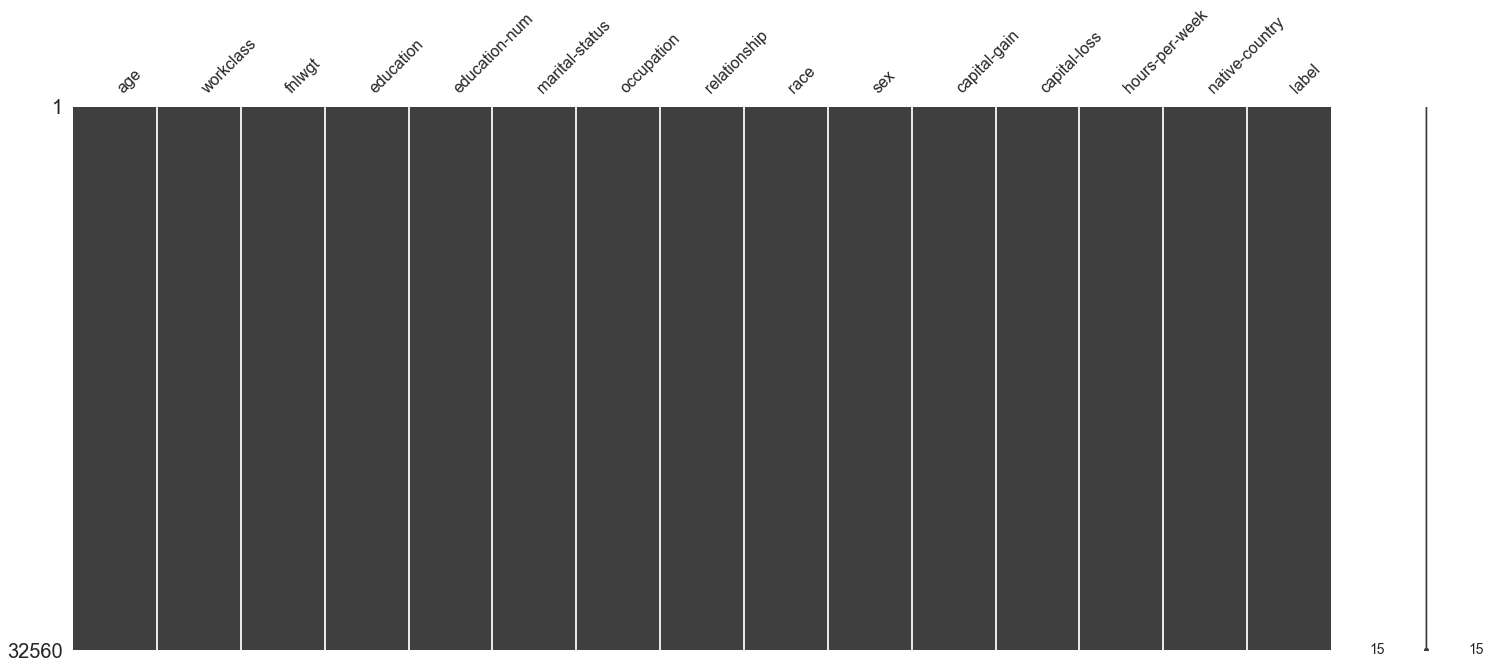

In [5]:
msno.matrix(data)

In [6]:
#There are no missing values:
data.shape

(32560, 15)

In [7]:
profiler=ProfileReport(data)
profiler

In [8]:
profiler.to_file(output_file='EDA_Census.html')

In [9]:
# There are Duplicate rows:

In [10]:
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [11]:
# Drop Duplicate rows
data.drop_duplicates(subset=data.columns,ignore_index=True,inplace=True)

In [12]:
data.shape

(32536, 15)

In [13]:
# There is imbalanced data in the categories which might affect the model accuracy.
# Categories with unusual category value:
data['workclass'].dtypes

dtype('O')

In [14]:
def set_unknown(var):
    if var.strip()=='?':
        return 'Unknown'
    else:
        return var
data['workclass']=data['workclass'].apply(lambda x:set_unknown(x))

In [15]:
data['native-country']=data['native-country'].apply(lambda x:set_unknown(x))
data['workclass'].value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
Unknown               1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

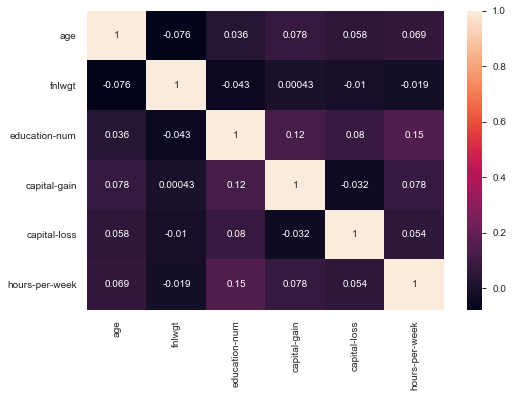

In [16]:
# Co-relation data from heatmap:
sns.heatmap(data[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']].corr(),annot=True)

In [17]:
# Only capital-gain and education-num have a very weak positive correlation. Might not affect .

In [18]:
# data['native-country'] -- level cardinality is very high so we will do label encoding
# data['workclass'] --> low cardinality so OneHot encoding
# data['label'] --> Label Encoding
# data['sex'] --> Label Encoding
# data['education']  --> Label encoding as cardinality of distinct count is very high
# data['marital-status'] --> One hot encoding
# data['occupation'] --> Label encoding
# data['relationship'] --> Onehot encoding
# data['race'] ---> One hot

In [19]:
#Label Encoder:
le=LabelEncoder()
data['native-country']=le.fit_transform(data['native-country'])
data['label']=le.fit_transform(data['label'])
data['sex']=le.fit_transform(data['sex'])
data['education']=le.fit_transform(data['education'])
data['occupation']=le.fit_transform(data['occupation'])

In [22]:
#Onehot Encoding:
data=pd.get_dummies(data,columns=['workclass','marital-status','relationship','race'])

In [23]:
data.head()

,age,fnlwgt,education,education-num,occupation,sex,capital-gain,capital-loss,hours-per-week,native-country,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,50,83311,9,13,4,1,0,0,13,38,...,0,0,0,0,0,0,0,0,0,1
1,38,215646,11,9,6,1,0,0,40,38,...,1,0,0,0,0,0,0,0,0,1
2,53,234721,1,7,6,1,0,0,40,38,...,0,0,0,0,0,0,0,1,0,0
3,28,338409,9,13,10,0,0,0,40,4,...,0,0,0,0,1,0,0,1,0,0
4,37,284582,12,14,4,0,0,0,40,38,...,0,0,0,0,1,0,0,0,0,1


In [25]:
y=data['label']
X=data.drop(['label'],axis=1)

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [49]:
z_scale=StandardScaler()
X_train=z_scale.fit_transform(X_train)
X_test=z_scale.transform(X_test)

## Support Vector Classifier:

In [34]:
model_svm=SVC(kernel='linear',random_state=0,C=10)

In [35]:
model_svm.fit(X_train,y_train)

SVC(C=10, kernel='linear', random_state=0)

In [36]:
model_svm.score(X_train,y_train)

0.8456662056247118

In [37]:
model_svm.score(X_test,y_test)

0.8340503995082975

In [39]:
model_svm_cm=confusion_matrix(y_test,model_svm.predict(X_test))
model_svm_cm

array([[4573,  372],
       [ 708,  855]], dtype=int64)

## Random Forest:

In [50]:
model_rf=RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
model_rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [51]:
model_rf.score(X_train,y_train)

0.9999615798370985

In [52]:
model_rf.score(X_test,y_test)

0.8517209588199139

In [53]:
model_rf_cm=confusion_matrix(y_test,model_rf.predict(X_test))
model_rf_cm

array([[4608,  337],
       [ 628,  935]], dtype=int64)

### Conclusion:

In [54]:
# Random Forest is performing better than the SVM as Random Forest is good at handling the categorical items and in the 
# given dataset we had more categorical variables than numerical.
# Further we can tune by the Gridsearch.